<a href="https://colab.research.google.com/github/kayeekim/kayeekim.github.io/blob/master/_code_practice/%EC%8B%A4%EB%AC%B4%EC%97%90_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_8_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 실무에 활용하는 머신러닝

http://www.kocw.net/home/cview.do?mty=p&kemId=1380150

## SVM 알고리즘 이해하기

### 장점
-. 특성이 다양한 데이터 분류에 강함

-. 파라미터 (cost, gamma) 를 조정해서 overfitting / underfitting 에 대응 가능

** cost: margin 너비 조절 변수
* cost가 클수록 margin 너비가 좁아짐 (overfitting 위험)
* cost가 작을수록 margin 너비가 넓어짐 (underfitting 위험)

** gamma: 커널의 표준 편차 조절 변수
* gamma 가 클수록, datapoint가 decision boundary 에 적은 영향을 미쳐 "경계가 구부러짐"
* gamma 가 작을수록, datapoint 가 decision boundary 에 큰 영향을 미쳐 "경계까 완만"

-. 적은 학습 데이터로도 정확도가 높은 분류 성능

### 단점
-. 데이터 전처리 과정이 매우 중요

-. feature 가 많을 경우, decision boundary 결정 및 데이터의 시각화가 어려움

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
display(df)
train, test = train_test_split(df, test_size=0.2) 

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


### 최적의 svm 파라미터 찾기 (GridSearchCV)


In [ ]:
# 최적의 svm 파라미터 찾기
# 사이킷런의 gridsearch 를 사용

#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
  svm_parameters = [{'kernel': ['rbf'],
                     'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}]
  print(f'svm_parameters: {svm_parameters}')

  clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)
  clf.fit(X, y)
  print(f'clf.best_params_ = {clf.best_params_}')
  return clf

X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

svm_parameters: [{'kernel': ['rbf'], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'C': [0.01, 0.1, 1, 10, 100, 1000]}]
clf.best_params_ = {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### SVM 모델 학습 및 Decision boundary 시각화

In [ ]:
# 시각화할 비용/감마 후보 저장
C_candidates = []
C_candidates.append(clf.best_params_['C'] * 0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C'] * 100)

gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.001)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 1000)

print(C_candidates)
print(gamma_candidates)

[0.001, 0.1, 10.0]
[0.001, 1, 1000]


In [ ]:
# 학습 데이터 전처리
X_train = train[['3P', 'BLK']]
Y_train = train['Pos'].tolist()
print(train['Pos'].value_counts())

position = []
for gt in Y_train:
  if gt == 'C': # 'C' 클래스의 속하는 경우
    position.append(0) 
  else:
    position.append(1)


C     41
SG    39
Name: Pos, dtype: int64


In [ ]:
# 파라미터 후보를 조합해서 모델 학습 및 학습된 모델 저장
classifiers = []
for C in C_candidates:
  for gamma in gamma_candidates:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_train,Y_train)
    classifiers.append((C, gamma, clf))

classifiers

[(0.001, 0.001, SVC(C=0.001, gamma=0.001)),
 (0.001, 1, SVC(C=0.001, gamma=1)),
 (0.001, 1000, SVC(C=0.001, gamma=1000)),
 (0.1, 0.001, SVC(C=0.1, gamma=0.001)),
 (0.1, 1, SVC(C=0.1, gamma=1)),
 (0.1, 1000, SVC(C=0.1, gamma=1000)),
 (10.0, 0.001, SVC(C=10.0, gamma=0.001)),
 (10.0, 1, SVC(C=10.0, gamma=1)),
 (10.0, 1000, SVC(C=10.0, gamma=1000))]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

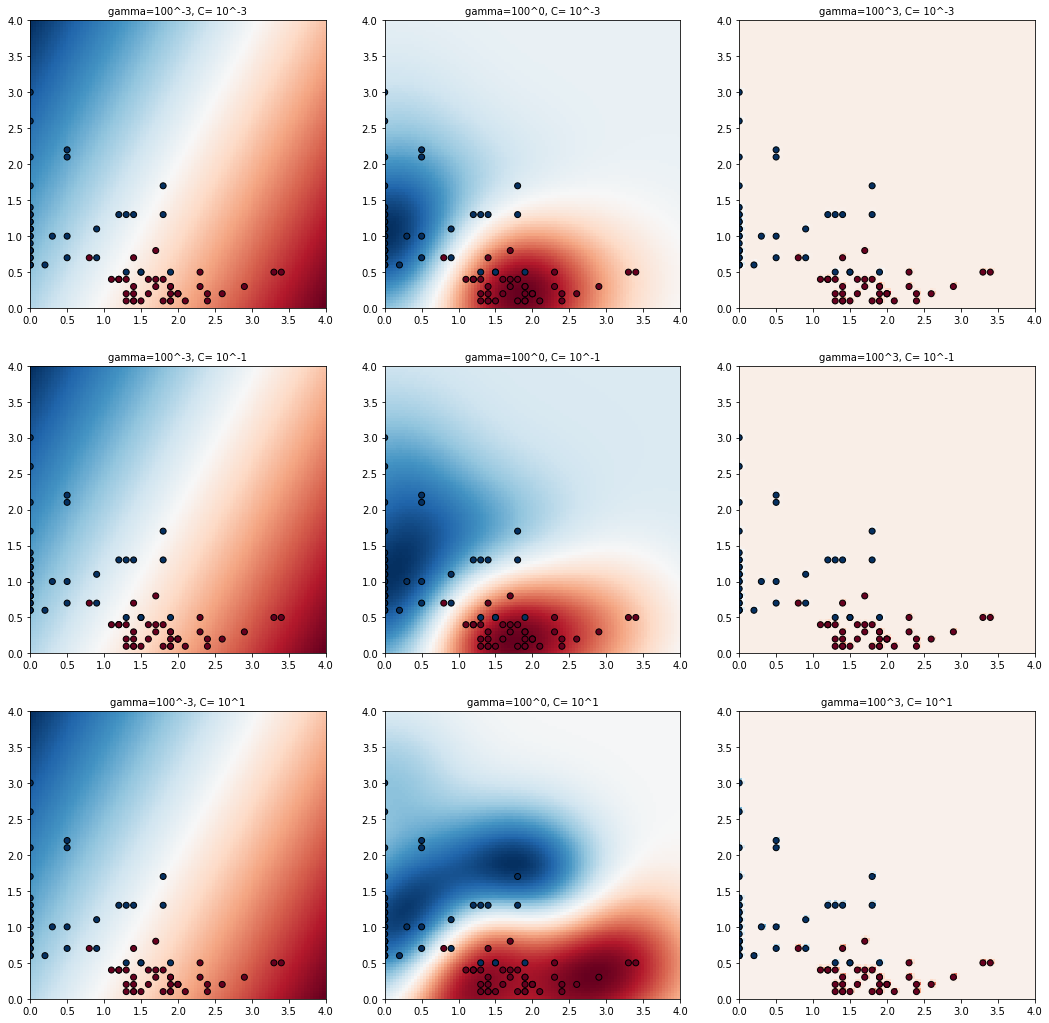

In [ ]:
# 각 모델 시각화
"""
(3) 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

    (Stack 1-D arrays as columns into a 2-D array)

   : np.c_[a, b]

   : np.column_stack([a, b])

   : np.concatenate((c.T, d.T), axis = 1) # for 2D~ array

출처: https://rfriend.tistory.com/352 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

"""
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100)) # 좌표 grid 생성
#print(xx)
#print(yy)

for (k, (C, gamma, clf)) in enumerate(classifiers):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision_function(X=array-like of shape (n_samples, n_features)): Evaluate the decision function for the samples in X
  Z = Z.reshape(xx.shape)
  #print(f'Z: \n{Z}')

  plt.subplot(len(C_candidates), len(gamma_candidates), k + 1)
  plt.title("gamma=100^%d, C= 10^%d" % (np.log10(gamma), np.log10(C)), 
            size='medium')
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
  plt.scatter(X_train['3P'], X_train['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

### 모델 테스트
-. gridsearch 를 통해 얻은 C 와 gamma 를 사용해 학습된 모델을 테스트

In [ ]:
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score

X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))                                     
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

              precision    recall  f1-score   support

           C       1.00      0.78      0.88         9
          SG       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20


accuracy : 0.9


In [ ]:
# 실제 예측값 확인
comparison = pd.DataFrame({'prediction': y_pred,
                           'ground_truth': y_true.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,C
7,SG,C
8,SG,SG
9,C,C
